In [1]:
import tensorflow as tf # keras utiliza el motor tensorflow como base -> mas sencillo keras
from sklearn.model_selection import GridSearchCV
import keras

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("BBBNGTheory.csv")

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Usaremos solo las 500 palabras con mas frecuencia en todo el corpus para generar los vectores
max_features=500

# Es decir que cada instancia tendrá 1000 features
cou_vec = TfidfVectorizer(max_features=max_features, max_df=0.9) # stop_words="english" , ngram_range=(1, 2)

In [13]:
matriz_titulos = cou_vec.fit_transform(df.palabras)

In [5]:
from sklearn.model_selection import train_test_split
data = df.drop(columns="Personaje")
targets = df.Personaje


# Dividir los datos en conjuntos de entrenamiento y prueba
train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size=0.2, random_state=42)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149 entries, 0 to 1148
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1149 non-null   int64 
 1   palabras    1149 non-null   object
 2   Personaje   1149 non-null   object
dtypes: int64(1), object(2)
memory usage: 27.1+ KB


In [7]:
from keras import models
from keras import layers

In [8]:
network = models.Sequential() # clf = LogisticRegression()
layer1 = layers.Dense(10, activation='relu', input_shape=(2,)) # 28*28 = 784(vector input)
network.add(layer1)
layer2 = layers.Dense(10, activation='relu') 
network.add(layer2)
layer_out = layers.Dense(5, activation='relu') # muticlasificación
network.add(layer_out)

In [9]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                140       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
Total params: 305 (1.19 KB)
Trainable params: 305 (1.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
# necesitamos "compilar" el modelo añadiendo la funcion de coste y el optimizador
network.compile(optimizer='rmsprop', # el tipo de gradient descent
                loss='categorical_crossentropy', # una funcion de error (depende del tipo de problema)
                metrics=['accuracy']) # metricas que quiero que me saquen

In [11]:
history = network.fit(train_data, train_targets, epochs=10, batch_size=101, validation_data=(test_data, test_targets))

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

In [10]:
history.history.keys()

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])

In [11]:
history.history['val_loss']

[3514.985595703125,
 2217.657470703125,
 1429.0570068359375,
 914.8416748046875,
 574.8386840820312,
 356.3820495605469,
 225.28529357910156,
 151.2347412109375,
 115.39576721191406,
 99.3712158203125]

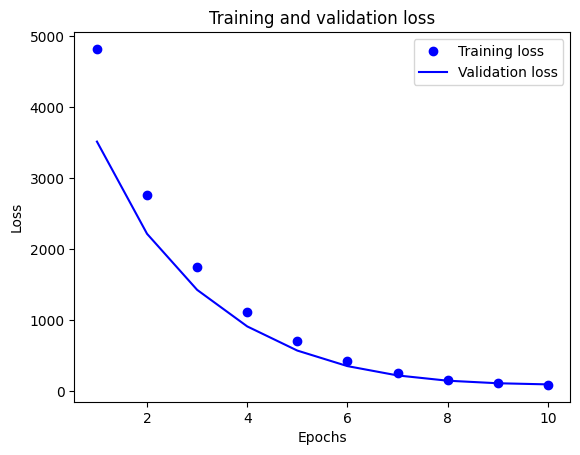

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

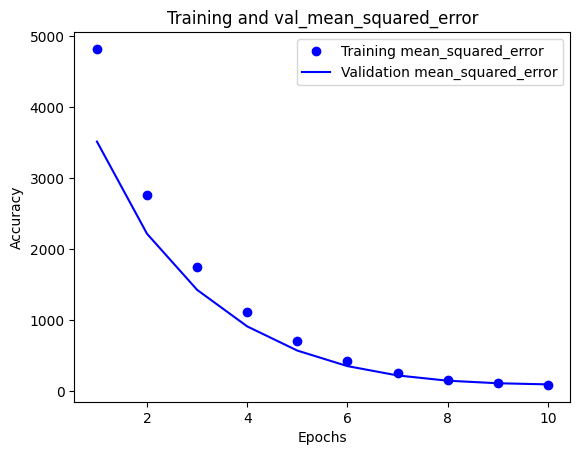

In [13]:
plt.clf()
acc_values = history_dict['mean_squared_error']
val_acc_values = history_dict['val_mean_squared_error']
plt.plot(epochs, acc_values, 'bo', label='Training mean_squared_error')
plt.plot(epochs, val_acc_values, 'b', label='Validation mean_squared_error')
plt.title('Training and val_mean_squared_error')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [14]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# Aplicar PolynomialFeatures
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
train_data_poly = poly.fit_transform(train_data)
test_data_poly = poly.transform(test_data)

# Aplicar StandartScaler
scaler = StandardScaler()
train_data_poly = scaler.fit_transform(train_data_poly)
test_data_poly = scaler.transform(test_data_poly)

# Construir la red neuronal con los datos preprocesados
model_poly = models.Sequential()
model_poly.add(layers.Dense(10, activation='relu', input_shape=(train_data_poly.shape[1],)))
model_poly.add(layers.Dense(10, activation='relu'))
model_poly.add(layers.Dense(1, activation='relu'))

# Compilar el modelo
model_poly.compile(loss='mean_squared_error',
                   optimizer='rmsprop',
                   metrics=['mean_squared_error'])

# Entrenar el modelo
model_poly.fit(train_data_poly, train_targets, epochs=100, batch_size=1, verbose=0)

# Evaluar el modelo
test_loss_poly, test_mse_poly = model_poly.evaluate(test_data_poly, test_targets)
print(f'Test MSE (con preprocesamiento): {test_mse_poly}')

4/4 [==============================] - 0s 6ms/step - loss: 16.8671 - mean_squared_error: 16.8671
Test MSE (con preprocesamiento): 16.86705780029297


In [15]:
history_poly = network.fit(train_data, train_targets, epochs=10, batch_size=101, validation_data=(test_data, test_targets))

Epoch 1/10
4/4 [==============================] - 0s 70ms/step - loss: 82.7335 - mean_squared_error: 82.7335 - val_loss: 91.5466 - val_mean_squared_error: 91.5466
Epoch 2/10
4/4 [==============================] - 0s 23ms/step - loss: 78.5226 - mean_squared_error: 78.5226 - val_loss: 86.3714 - val_mean_squared_error: 86.3714
Epoch 3/10
4/4 [==============================] - 0s 26ms/step - loss: 76.1824 - mean_squared_error: 76.1824 - val_loss: 83.3016 - val_mean_squared_error: 83.3016
Epoch 4/10
4/4 [==============================] - 0s 23ms/step - loss: 74.9367 - mean_squared_error: 74.9367 - val_loss: 80.4225 - val_mean_squared_error: 80.4225
Epoch 5/10
4/4 [==============================] - 0s 24ms/step - loss: 73.1530 - mean_squared_error: 73.1530 - val_loss: 78.6023 - val_mean_squared_error: 78.6023
Epoch 6/10
4/4 [==============================] - 0s 23ms/step - loss: 72.0806 - mean_squared_error: 72.0806 - val_loss: 76.3337 - val_mean_squared_error: 76.3337
Epoch 7/10
4/4 [======

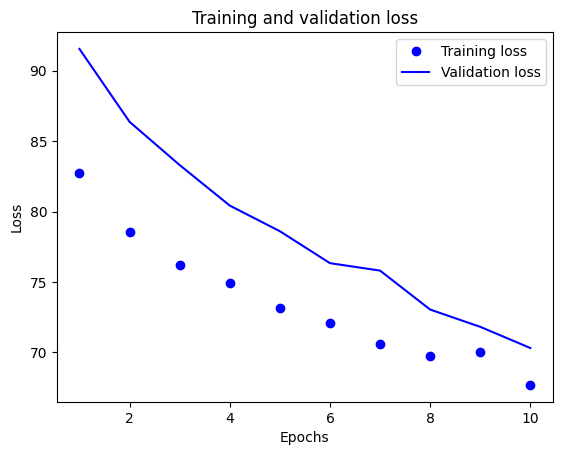

In [16]:
%matplotlib inline
history_dict = history_poly.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

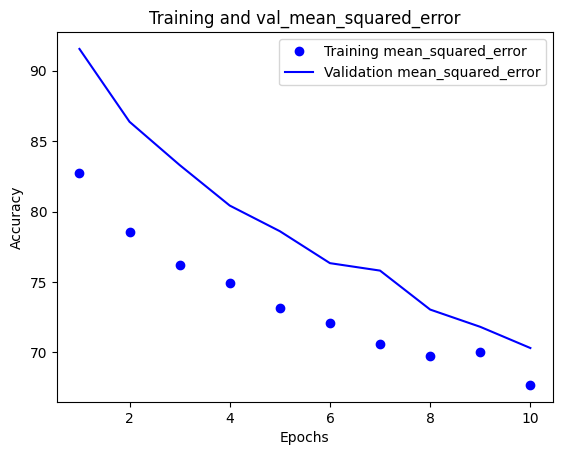

In [17]:
plt.clf()
acc_values = history_dict['mean_squared_error']
val_acc_values = history_dict['val_mean_squared_error']
plt.plot(epochs, acc_values, 'bo', label='Training mean_squared_error')
plt.plot(epochs, val_acc_values, 'b', label='Validation mean_squared_error')
plt.title('Training and val_mean_squared_error')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()